In [7]:

import numpy as np
import cv2
from skimage import io
import os
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Set the file path
    file="test"
    type_f="masks"
    folder_path = 'DukeData/' + file + '/' + type_f
    output_path = 'Dataset/' + file + '/' + type_f
    #create the output folder if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Read all the masks in the .npy masks from folder_path
    for filename in os.listdir(folder_path):
        img = np.load(os.path.join(folder_path, filename))
        io.imsave(os.path.join(output_path, filename[:-4] + '.tif'), img)

In [15]:
# loop over the images in 128_patches/images
from PIL import Image
from skimage import io
import os
directory = "Dataset/val/masks/"
for filename in os.listdir(directory):
    img = io.imread(os.path.join(directory, filename))
    #print(img.shape)

    # Convert the NumPy array to an Image object
    img = Image.fromarray(img)
    #convert to grayscale
    img = img.convert('L')
    #img=img.convert("RGB")
    img = img.resize((224, 224))

    # Save the converted image to a file
    img.save(os.path.join(directory, filename))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
(224, 224) (224, 224)
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
(224, 224) (224, 224)
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
(224, 224) (224, 224)


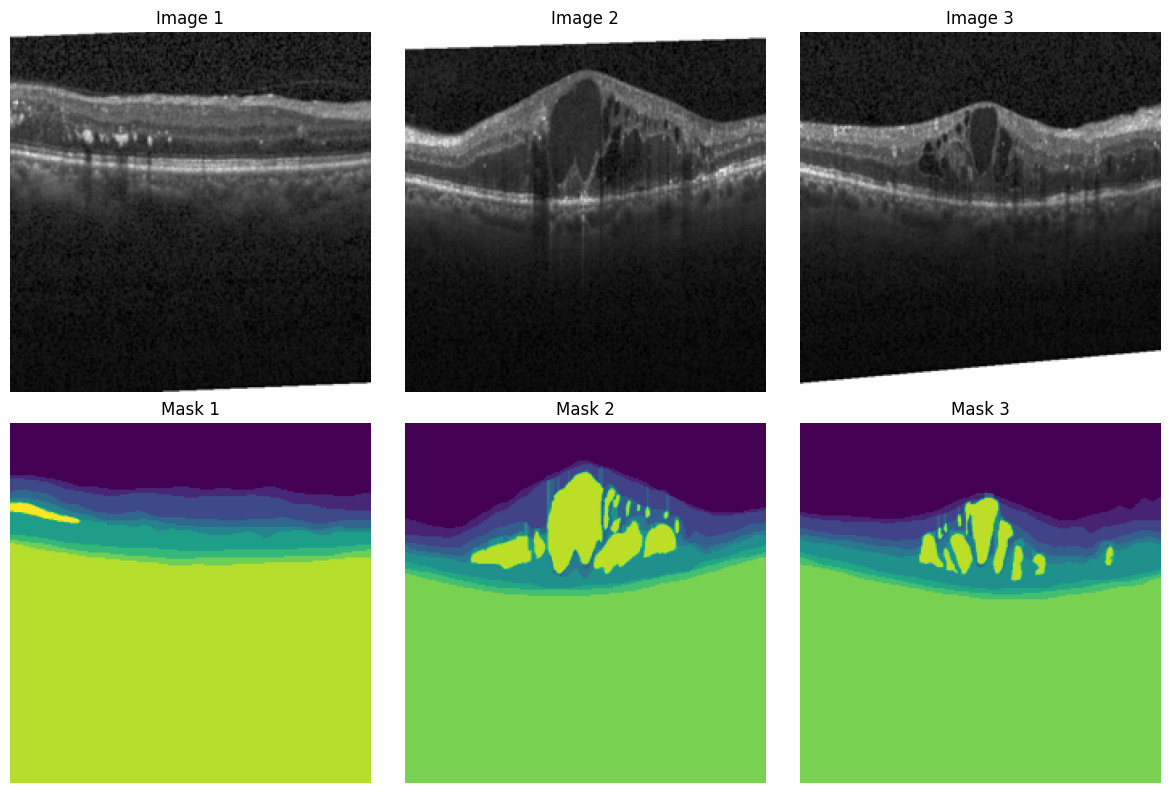

In [25]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np  # You need to import numpy to use np.array

root_dir = 'Dataset'
images_dir = os.path.join(root_dir, 'train', 'images')  # Update this to your noisy crops path
masks_dir = os.path.join(root_dir, 'train', 'masks')  # Update this to your masks path

# List all .tif files in the images directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.tif')]

# Randomly select 3 images and masks
selected_files = random.sample(image_files, 3)

# Create a 2x3 grid to display images and masks
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, file in enumerate(selected_files):
    image_path = os.path.join(images_dir, file)
    mask_path = os.path.join(masks_dir, file)

    image = Image.open(image_path)
    mask = Image.open(mask_path)
    #print number of unique values in mask
    print(np.unique(mask))
    if np.unique(mask).size!=11:
        # convert to grayscale
        mask = mask.convert('L')
    print(np.unique(mask))

    print(image.size, mask.size)

    # Display the image and mask in the grid
    axes[0, i].imshow(image)
    axes[0, i].set_title(f'Image {i+1}')
    axes[0, i].axis('off')

    axes[1, i].imshow(mask)
    axes[1, i].set_title(f'Mask {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [34]:

def get_data_paths(type_data):

    dataset_dir = "Dataset"  # Change this to the root directory of your dataset

    train_dir = os.path.join(dataset_dir, "train", type_data)
    test_dir = os.path.join(dataset_dir, "test", type_data)
    val_dir = os.path.join(dataset_dir, "val",type_data)

    # Get a list of file paths in each directory
    train_file_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]
    test_file_paths = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]
    val_file_paths = [os.path.join(val_dir, filename) for filename in os.listdir(val_dir)]

    # Combine all file paths into one list
    all_file_paths = train_file_paths + test_file_paths + val_file_paths

    # Randomly shuffle the list
    random.shuffle(all_file_paths)

    # Choose 40% of the file paths
    chosen_file_paths = all_file_paths[:int(0.4 * len(all_file_paths))]

    # Now, chosen_file_paths contains 40% of the random file paths
    print(chosen_file_paths)
    
get_data_paths("images")

['Dataset/val/images/Subject_08_09.tif', 'Dataset/train/images/Subject_02_01.tif', 'Dataset/train/images/Subject_04_05.tif', 'Dataset/train/images/Subject_05_02.tif', 'Dataset/val/images/Subject_07_07.tif', 'Dataset/test/images/Subject_09_03.tif', 'Dataset/train/images/Subject_05_10.tif', 'Dataset/test/images/Subject_10_05.tif', 'Dataset/val/images/Subject_08_06.tif', 'Dataset/train/images/Subject_01_10.tif', 'Dataset/train/images/Subject_06_08.tif', 'Dataset/test/images/Subject_09_02.tif', 'Dataset/train/images/Subject_06_03.tif', 'Dataset/train/images/Subject_02_09.tif', 'Dataset/train/images/Subject_02_08.tif', 'Dataset/train/images/Subject_03_10.tif', 'Dataset/train/images/Subject_03_09.tif', 'Dataset/train/images/Subject_03_01.tif', 'Dataset/train/images/Subject_04_10.tif', 'Dataset/train/images/Subject_05_09.tif', 'Dataset/train/images/Subject_05_08.tif', 'Dataset/test/images/Subject_10_09.tif', 'Dataset/train/images/Subject_04_06.tif', 'Dataset/train/images/Subject_01_00.tif', '